In [1]:
import torch

from sbi import inference
from sbi import simulators
from sbi import utils

from matplotlib import pyplot as plt

# use GPU if available
if torch.cuda.is_available():
    device = torch.device("cuda")
    torch.set_default_tensor_type("torch.cuda.FloatTensor")
else:
    device = torch.device("cpu")
    torch.set_default_tensor_type("torch.FloatTensor")

# SNL 

In [3]:
# get simulator and prior
simulator, prior, ground_truth_parameters, true_observation = simulators.get_simulator_prior_and_groundtruth('mg1')
parameter_dim = ground_truth_parameters.shape[0]
observation_dim = true_observation.shape[0]

# get neural likelihood
neural_likelihood = utils.get_neural_likelihood(
    "maf",
    parameter_dim=parameter_dim,
    observation_dim=observation_dim,
)

# create inference method
inference_method = inference.SNL(
    simulator=simulator,
    prior=prior,
    true_observation=true_observation,
    neural_likelihood=neural_likelihood,
    mcmc_method="slice-np",
)

/home/janfb/anaconda3/envs/lfi/lib/python3.7/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [ ]:
# run inference
inference_method.run_inference(num_rounds=1, num_simulations_per_round=1000)

In [5]:
# sample posterior
samples = inference_method.sample_posterior(num_samples=1000)


Generating samples: 100%|██████████| 20/20 [00:14<00:00,  1.36it/s]

Generating samples: 100%|██████████| 1000/1000 [12:24<00:00,  1.34it/s]


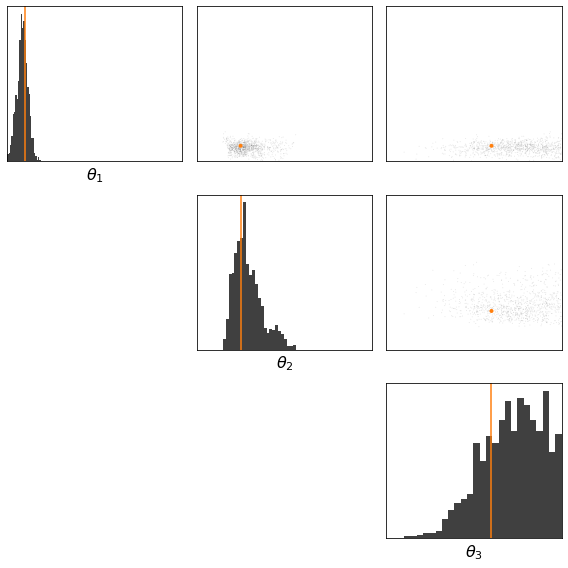

In [6]:
# plot samples
utils.plot_hist_marginals(
    utils.tensor2numpy(samples),
    lims=simulator.parameter_plotting_limits,
    ground_truth=utils.tensor2numpy(ground_truth_parameters).reshape(
        -1
    ),
)
plt.show()